MATHS IMPLEMENTATION- Gaussian

In [1]:
import numpy as np

In [4]:
import seaborn as sns
df=sns.load_dataset('tips')

        

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.drop(index=202,inplace=True,axis=1)
df.drop(columns=['tip','sex','smoker','day'])

In [ ]:
import numpy as np

class GaussianNB:

    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]

            # prior
            self.priors[c] = len(X_c) / len(X)

            # mean
            self.mean[c] = np.mean(X_c, axis=0)

            # variance
            self.var[c] = np.var(X_c, axis=0) + 1e-9


    def _gaussian(self, x, mean, var): #P(features|class) or p(xi|c) formula for gaussian 
        return (1 / np.sqrt(2 * np.pi * var)) * \
               np.exp(-(x - mean)**2 / (2 * var))


    def predict(self, X):
        predictions = []

        for x in X:
            posteriors = []

            for c in self.classes:
                prior = np.log(self.priors[c])

                likelihood = np.sum(
                    np.log(self._gaussian(x, self.mean[c], self.var[c]))
                )

                posteriors.append(prior + likelihood)

            predictions.append(self.classes[np.argmax(posteriors)])

        return np.array(predictions)


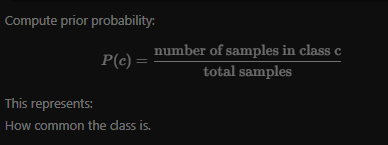  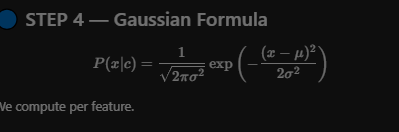   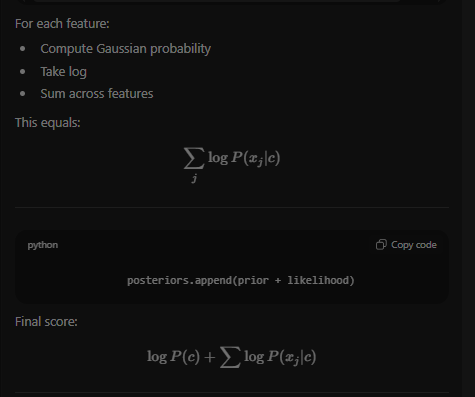

## compute for every class and whose score is high gets predicted

In [33]:
df_copy=sns.load_dataset('tips')
df_copy.drop(index=202,inplace=True,axis=1)
y=df_copy["time"]


In [ ]:
df
X = df.drop("time", axis=1).values
X


array([[16.99,  2.  ],
       [10.34,  3.  ],
       [21.01,  3.  ],
       [23.68,  2.  ],
       [24.59,  4.  ],
       [25.29,  4.  ],
       [ 8.77,  2.  ],
       [26.88,  4.  ],
       [15.04,  2.  ],
       [14.78,  2.  ],
       [10.27,  2.  ],
       [35.26,  4.  ],
       [15.42,  2.  ],
       [18.43,  4.  ],
       [14.83,  2.  ],
       [21.58,  2.  ],
       [10.33,  3.  ],
       [16.29,  3.  ],
       [16.97,  3.  ],
       [20.65,  3.  ],
       [17.92,  2.  ],
       [20.29,  2.  ],
       [15.77,  2.  ],
       [39.42,  4.  ],
       [19.82,  2.  ],
       [17.81,  4.  ],
       [13.37,  2.  ],
       [12.69,  2.  ],
       [21.7 ,  2.  ],
       [19.65,  2.  ],
       [ 9.55,  2.  ],
       [18.35,  4.  ],
       [15.06,  2.  ],
       [20.69,  4.  ],
       [17.78,  2.  ],
       [24.06,  3.  ],
       [16.31,  3.  ],
       [16.93,  3.  ],
       [18.69,  3.  ],
       [31.27,  3.  ],
       [16.04,  3.  ],
       [17.46,  2.  ],
       [13.94,  2.  ],
       [ 9.

In [36]:
y=y.values

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [39]:
model = GaussianNB()      # create object

model.fit(X_train, y_train)   # train model

y_pred = model.predict(X_test)  # predict


In [43]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

      Dinner       0.87      0.95      0.91        42
       Lunch       0.33      0.14      0.20         7

    accuracy                           0.84        49
   macro avg       0.60      0.55      0.55        49
weighted avg       0.79      0.84      0.81        49



In [44]:
print(accuracy_score(y_pred,y_test))

0.8367346938775511


## Check with actual sklearn

In [45]:
from sklearn.naive_bayes import GaussianNB as SkGaussianNB

sk_model = SkGaussianNB()
sk_model.fit(X_train, y_train)

sk_pred = sk_model.predict(X_test)

print("Your Model Accuracy:", np.mean(y_pred == y_test))
print("Sklearn Accuracy:", np.mean(sk_pred == y_test))


Your Model Accuracy: 0.8367346938775511
Sklearn Accuracy: 0.8367346938775511


In [46]:
print("Means:", model.mean)
print("Variances:", model.var)
print("Priors:", model.priors)
## internal parameters

Means: {'Dinner': array([20.9608209 ,  2.64925373]), 'Lunch': array([17.97766667,  2.48333333])}
Variances: {'Dinner': array([80.45123888,  0.77996213]), 'Lunch': array([60.12251789,  1.14972222])}
Priors: {'Dinner': 0.6907216494845361, 'Lunch': 0.30927835051546393}


In [47]:
import pickle

with open("gaussian_nb_model.pkl", "wb") as f:
    pickle.dump(model, f)


## COMPLETED